In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Import the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

def train_polynomial_model(data_file_path="Housing_data_final.csv", train_size=0.5, random_state=10, degree = 2):
    # Load data
    housing = pd.DataFrame(pd.read_csv(data_file_path))

    # We specify this so that the train and test data set always have the same rows, respectively
    np.random.seed(0)
    df_train, df_test = train_test_split(housing, train_size=train_size, test_size=1-train_size, random_state=random_state)

    # Apply MinMaxScaler to numerical columns
    num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'dtrec','dthospital', 'hotwater', 'ac', 'furnish', 'parking', 'security']
    scaler = MinMaxScaler()
    df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

    # Prepare training data
    y_train = df_train.pop('price')
    X_train = df_train

    # Apply PolynomialFeatures
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=True)
    xp = polynomial_features.fit_transform(X_train)

    # Train the model
    model = sm.OLS(y_train, xp).fit()

    return model, polynomial_features, num_vars[1:]

def predict_prices_with_polynomial_model(model, polynomial_features, feature_names, new_data_dict_list):
    predictions = []

    for new_data_dict in new_data_dict_list:
        # Extract features from the dictionary
        new_data = [[new_data_dict[feature] for feature in feature_names]]

        # Transform the new input features using PolynomialFeatures
        new_data_transformed = polynomial_features.transform(new_data)

        # Make predictions using the trained model
        prediction = model.predict(new_data_transformed)
        predictions.append(prediction[0])

    return predictions

# Example usage:
def predict_prices(data_file_path, new_data_dict_list, train_size=0.5, random_state=10, degree=2):
    model, polynomial_features, feature_names = train_polynomial_model(data_file_path, train_size, random_state, degree)
    predictions = predict_prices_with_polynomial_model(model, polynomial_features, feature_names, new_data_dict_list)
    return predictions

# Example usage:
new_data_dict_list = [
    {'area': 120, 'bedrooms': 3, 'bathrooms': 2, 'washingmachine': 1, 'dtcenter': 5, 'dtrec': 10,
     'dthospital': 3, 'hotwater': 1, 'ac': 1, 'furnish': 2, 'parking': 1, 'security': 1},
    # Add more dictionaries for additional instances
]

predictions = predict_prices("Housing_data_final.csv", new_data_dict_list)
print(predictions)


[5098.665442926526]


In [20]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Import the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm  
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

def train_polynomial_model(data_file_path="Housing_data_final.csv", degree=2):
    # Load data
    housing = pd.DataFrame(pd.read_csv(data_file_path))

    # Apply MinMaxScaler to numerical columns
    num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'dtrec','dthospital', 'hotwater', 'ac', 'furnish', 'parking', 'security']
    scaler = MinMaxScaler()
    housing[num_vars] = scaler.fit_transform(housing[num_vars])

    # Prepare training data
    y_train = housing.pop('price')
    X_train = housing

    # Apply PolynomialFeatures
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=True)
    xp = polynomial_features.fit_transform(X_train)

    # Train the model
    model = sm.OLS(y_train, xp).fit()

    return model, polynomial_features, num_vars[1:]

def predict_prices_with_polynomial_model(model, polynomial_features, feature_names, new_data_dict_list):
    predictions = []

    for new_data_dict in new_data_dict_list:
        # Extract features from the dictionary
        new_data = [[new_data_dict[feature] for feature in feature_names]]

        # Transform the new input features using PolynomialFeatures
        new_data_transformed = polynomial_features.transform(new_data)

        # Make predictions using the trained model
        prediction = model.predict(new_data_transformed)
        predictions.append(prediction[0])

    return predictions

# Example usage:
def predict_prices(data_file_path, new_data_dict_list, degree=2):
    model, polynomial_features, feature_names = train_polynomial_model(data_file_path, degree)
    predictions = predict_prices_with_polynomial_model(model, polynomial_features, feature_names, new_data_dict_list)
    return predictions

# Example usage:
new_data_dict_list = [
    {'area': 100, 'bedrooms': 2, 'bathrooms': 2, 'washingmachine': 1, 'dtcenter': 0.5, 'dtrec': 0.5,
     'dthospital': 0.3, 'hotwater': 1, 'ac': 2, 'furnish': 2, 'parking': 1, 'security': 1},
    # Add more dictionaries for additional instances
]

predictions = predict_prices("Housing_data_final.csv", new_data_dict_list)
print(predictions)


[972.4696927824734]


Mean Squared Error: 204414908639.64612


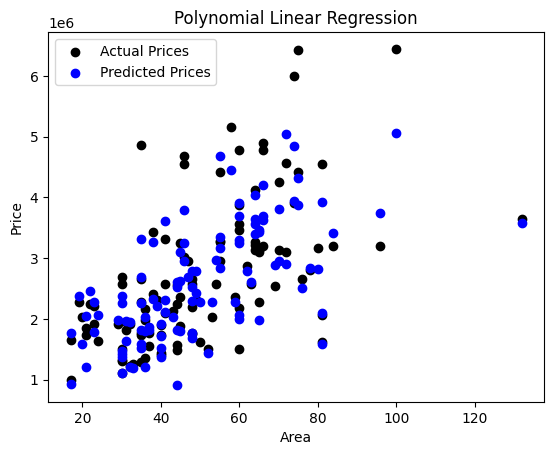

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = 'Housing_data_final.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Define the features (independent variables) and target (dependent variable)
num_vars = ['area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'dtrec', 'dthospital', 'hotwater', 'ac', 'furnish', 'parking', 'security']
X = data[num_vars]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression with degree 2 (you can change the degree as needed)
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the polynomial linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict the prices on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predicted vs. actual prices
plt.scatter(X_test['area'], y_test, color='black', label='Actual Prices')
plt.scatter(X_test['area'], y_pred, color='blue', label='Predicted Prices')
plt.title('Polynomial Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()
